In [1]:
import pandas as pd
import numpy as np
#import geopandas as gpd
#import geodatasets
#import contextily as cx
import seaborn as sns

In [2]:
#pip install openpyxl

In [3]:
anambra = pd.read_excel('anambra_crosschecked.xlsx')

In [4]:
anambra.head()

,Address,Latitude,Longitude,APC,LP,PDP,NNPP
0,"NSUGBE CIVIC CENTRE, ANAMBRA EAST, ANAMBRA",6.263704,6.820362,0,102,1,1
1,"ILO UMUAKOSIAM, ANAMBRA EAST, ANAMBRA",6.309297,6.867267,0,52,0,0
2,"ILO UMUAKOSIAM, ANAMBRA EAST, ANAMBRA",6.309297,6.867267,0,98,0,1
3,"OBELEMILI ESTATE, ANAMBRA EAST, ANAMBRA",6.309297,6.867267,0,11,0,0
4,"OSSY DRIVE NJIKOKA, ANAMBRA EAST, ANAMBRA",6.309297,6.867267,0,121,0,1


In [5]:
anambra.to_csv('anambra.csv', index=False)

In [6]:
anambra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Address    676 non-null    object 
 1   Latitude   676 non-null    float64
 2   Longitude  676 non-null    float64
 3   APC        676 non-null    int64  
 4   LP         676 non-null    int64  
 5   PDP        676 non-null    int64  
 6   NNPP       676 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 37.1+ KB


In [7]:
anambra.shape

(676, 7)

In [8]:
#anambra_gpd = gpd.GeoDataFrame(anambra, geometry=gpd.points_from_xy(anambra.Longitude, anambra.Latitude), crs='EPSG:4326')

In [9]:
#anambra_gpd.head()

In [10]:
import matplotlib.pyplot as plt

In [11]:
#ax = anambra_gpd.plot(figsize=(10,10), color='red', edgecolor = 'k')
#ax.set_axis_off()
#cx.add_basemap(ax, zoom=4, crs=data_gpd.crs,source=cx.providers.CartoDB.Voyager)

In [12]:
anambra_worked = anambra.copy()
anambra_worked['polling_unit_id'] = np.random.rand(len(anambra))

In [14]:
pip install geopy

  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for geographiclib<3,>=1.52 from https://files.pythonhosted.org/packages/9f/5a/a26132406f1f40cf51ea349a5f11b0a46cec02a2031ff82e391c2537247a/geographiclib-2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --------- ------------------------------ 30.7/125.4 kB ? eta -:--:--
   --------- ------------------------------ 30.7/125.4 kB ? eta -:--:--
   --------- ------------------------------ 30.7/125.4 kB ? eta -:--:--
   --------- ------------------------------ 30.7/125.4 kB ? eta -:--:--
   --------- ------------------------------ 30.7/125.4 kB ? eta -:--:--
   --------- ------------------------------ 30.7/125.4 kB ? eta -:--:--
   ------------- -------------------------- 41.0/125.4 kB 85.6 kB/s eta 0:00:01
   -

In [15]:
from geopy.distance import geodesic
import numpy as np

In [16]:
# Step 2: Neighbour Identification

# Define radius in kilometers
RADIUS = 2.0

def find_neighbours(row, anambra_worked):
    neighbours = []
    for idx, unit in anambra_worked.iterrows():
        if row.name != idx:
            distance = geodesic((row['Latitude'], row['Longitude']), (unit['Latitude'], unit['Longitude'])).km
            if distance <= RADIUS:
                neighbours.append(unit['Address'])
    return neighbours

#anambra['neighbours'] = anambra.apply(lambda row: find_neighbours(row, anambra), axis=1)


In [17]:
#anambra_worked['neighbours'] = anambra_worked.apply(lambda row: find_neighbours(row, anambra_worked), axis=1)

In [18]:
anambra_worked.head()

,Address,Latitude,Longitude,APC,LP,PDP,NNPP,polling_unit_id,neighbours
0,"NSUGBE CIVIC CENTRE, ANAMBRA EAST, ANAMBRA",6.263704,6.820362,0,102,1,1,0.089086,[]
1,"ILO UMUAKOSIAM, ANAMBRA EAST, ANAMBRA",6.309297,6.867267,0,52,0,0,0.704738,"[ILO UMUAKOSIAM, ANAMBRA EAST, ANAMBRA, OBELEM..."
2,"ILO UMUAKOSIAM, ANAMBRA EAST, ANAMBRA",6.309297,6.867267,0,98,0,1,0.752391,"[ILO UMUAKOSIAM, ANAMBRA EAST, ANAMBRA, OBELEM..."
3,"OBELEMILI ESTATE, ANAMBRA EAST, ANAMBRA",6.309297,6.867267,0,11,0,0,0.428235,"[ILO UMUAKOSIAM, ANAMBRA EAST, ANAMBRA, ILO UM..."
4,"OSSY DRIVE NJIKOKA, ANAMBRA EAST, ANAMBRA",6.309297,6.867267,0,121,0,1,0.428828,"[ILO UMUAKOSIAM, ANAMBRA EAST, ANAMBRA, ILO UM..."


In [19]:
anambra_worked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          676 non-null    object 
 1   Latitude         676 non-null    float64
 2   Longitude        676 non-null    float64
 3   APC              676 non-null    int64  
 4   LP               676 non-null    int64  
 5   PDP              676 non-null    int64  
 6   NNPP             676 non-null    int64  
 7   polling_unit_id  676 non-null    float64
 8   neighbours       676 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 47.7+ KB


In [20]:
units_with_neighbours = anambra_worked[~anambra_worked['neighbours'].apply(lambda x: len(x) == 0)]
units_with_neighbours.head()

,Address,Latitude,Longitude,APC,LP,PDP,NNPP,polling_unit_id,neighbours
1,"ILO UMUAKOSIAM, ANAMBRA EAST, ANAMBRA",6.309297,6.867267,0,52,0,0,0.704738,"[ILO UMUAKOSIAM, ANAMBRA EAST, ANAMBRA, OBELEM..."
2,"ILO UMUAKOSIAM, ANAMBRA EAST, ANAMBRA",6.309297,6.867267,0,98,0,1,0.752391,"[ILO UMUAKOSIAM, ANAMBRA EAST, ANAMBRA, OBELEM..."
3,"OBELEMILI ESTATE, ANAMBRA EAST, ANAMBRA",6.309297,6.867267,0,11,0,0,0.428235,"[ILO UMUAKOSIAM, ANAMBRA EAST, ANAMBRA, ILO UM..."
4,"OSSY DRIVE NJIKOKA, ANAMBRA EAST, ANAMBRA",6.309297,6.867267,0,121,0,1,0.428828,"[ILO UMUAKOSIAM, ANAMBRA EAST, ANAMBRA, ILO UM..."
5,"SUNSHINE ESTATE, ANAMBRA EAST, ANAMBRA",6.309297,6.867267,0,63,0,0,0.437804,"[ILO UMUAKOSIAM, ANAMBRA EAST, ANAMBRA, ILO UM..."


In [21]:
units_with_neighbours.shape

(646, 9)

In [22]:
units_with_neighbours.to_csv('anambra_n.csv', index=False)

In [23]:
#calculate outlier score
def calculate_outlier_score(row, anambra_worked):
    neighbours = anambra_worked[anambra_worked['Address'].isin(row['neighbours'])]
    scores = {}
    for party in ['APC', 'LP', 'PDP','NNPP']: 
        neighbour_votes = neighbours[party].values
        mean_votes = np.mean(neighbour_votes)
        std_votes = np.std(neighbour_votes)
        if std_votes == 0:
            scores[party] = 0
        else:
            scores[party] = abs(row[party] - mean_votes) / std_votes
    return scores

In [24]:
anambra_worked['outlier_scores'] = anambra_worked.apply(lambda row: calculate_outlier_score(row, anambra_worked), axis=1)

C:\Users\Ozy\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Ozy\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Ozy\anaconda3\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Ozy\anaconda3\Lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\Ozy\anaconda3\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [25]:
anambra_worked

,Address,Latitude,Longitude,APC,LP,PDP,NNPP,polling_unit_id,neighbours,outlier_scores
0,"NSUGBE CIVIC CENTRE, ANAMBRA EAST, ANAMBRA",6.263704,6.820362,0,102,1,1,0.089086,[],"{'APC': nan, 'LP': nan, 'PDP': nan, 'NNPP': nan}"
1,"ILO UMUAKOSIAM, ANAMBRA EAST, ANAMBRA",6.309297,6.867267,0,52,0,0,0.704738,"[ILO UMUAKOSIAM, ANAMBRA EAST, ANAMBRA, OBELEM...","{'APC': 0.2581988897471611, 'LP': 0.1565157289..."
2,"ILO UMUAKOSIAM, ANAMBRA EAST, ANAMBRA",6.309297,6.867267,0,98,0,1,0.752391,"[ILO UMUAKOSIAM, ANAMBRA EAST, ANAMBRA, OBELEM...","{'APC': 0.2581988897471611, 'LP': 1.4224011849..."
3,"OBELEMILI ESTATE, ANAMBRA EAST, ANAMBRA",6.309297,6.867267,0,11,0,0,0.428235,"[ILO UMUAKOSIAM, ANAMBRA EAST, ANAMBRA, ILO UM...","{'APC': 0.2672612419124244, 'LP': 1.0368107000..."
4,"OSSY DRIVE NJIKOKA, ANAMBRA EAST, ANAMBRA",6.309297,6.867267,0,121,0,1,0.428828,"[ILO UMUAKOSIAM, ANAMBRA EAST, ANAMBRA, ILO UM...","{'APC': 0.2672612419124244, 'LP': 2.5045202041..."
...,...,...,...,...,...,...,...,...,...,...
671,NODU VILLAGE HALL VII (OPEN SPACE OPPOSITE NOD...,6.232450,7.070117,0,51,0,0,0.689198,"[EZIOGBO P/S II, AWKA NORTH, ANAMBRA, TIPPER G...","{'APC': 0.4649905549752772, 'LP': 0.1416120688..."
672,NIGERIA UNION OF JOURNALISTS PREMISES (OPEN SP...,6.206956,7.067749,2,95,0,0,0.394874,[OGBOYE SQUARE (OPEN SPACE OPPOSITE CONSOLATRI...,"{'APC': 2.108590488016543, 'LP': 0.43178653432..."
673,"OKOCHI VILLAGE HALL II, AWKA SOUTH, ANAMBRA",6.237463,7.109021,0,0,0,0,0.626237,"[DEMONSTRATION PRIMARY SCHOOL II, AWKA SOUTH, ...","{'APC': 0.7071067811865475, 'LP': 1.5510759842..."
674,"UMUNNACHI EBENATO UDENE VILL. HALL, NNEWI SOUT...",5.935036,6.987530,1,13,0,1,0.936225,[],"{'APC': nan, 'LP': nan, 'PDP': nan, 'NNPP': nan}"


In [26]:
# apply pd.Series to the 'info' column to expand it into separate columns
expanded_df = anambra_worked['outlier_scores'].apply(pd.Series)


In [27]:
expanded_df1 = expanded_df.rename(columns={'APC':'apc_outlier_score', 'LP': 'lp_outlier_score', 'PDP': 'pdp_outlier_score', 'NNPP': 'nnpp_outlier_score'})

In [28]:
expanded_df1

,apc_outlier_score,lp_outlier_score,pdp_outlier_score,nnpp_outlier_score
0,NaN,NaN,NaN,NaN
1,0.258199,0.156516,0.461957,0.377964
2,0.258199,1.422401,0.461957,2.645751
3,0.267261,1.036811,0.480537,0.392232
4,0.267261,2.504520,0.480537,3.741657
...,...,...,...,...
671,0.464991,0.141612,0.420505,0.293610
672,2.108590,0.431787,0.439057,0.314485
673,0.707107,1.551076,0.925820,0.000000
674,NaN,NaN,NaN,NaN


In [29]:
# Concatenate the expanded columns with the original DataFrame
anambra_df = pd.concat([anambra_worked.drop(columns=['outlier_scores']), expanded_df1], axis=1)

In [30]:
anambra_df.head()

,Address,Latitude,Longitude,APC,LP,PDP,NNPP,polling_unit_id,neighbours,apc_outlier_score,lp_outlier_score,pdp_outlier_score,nnpp_outlier_score
0,"NSUGBE CIVIC CENTRE, ANAMBRA EAST, ANAMBRA",6.263704,6.820362,0,102,1,1,0.089086,[],NaN,NaN,NaN,NaN
1,"ILO UMUAKOSIAM, ANAMBRA EAST, ANAMBRA",6.309297,6.867267,0,52,0,0,0.704738,"[ILO UMUAKOSIAM, ANAMBRA EAST, ANAMBRA, OBELEM...",0.258199,0.156516,0.461957,0.377964
2,"ILO UMUAKOSIAM, ANAMBRA EAST, ANAMBRA",6.309297,6.867267,0,98,0,1,0.752391,"[ILO UMUAKOSIAM, ANAMBRA EAST, ANAMBRA, OBELEM...",0.258199,1.422401,0.461957,2.645751
3,"OBELEMILI ESTATE, ANAMBRA EAST, ANAMBRA",6.309297,6.867267,0,11,0,0,0.428235,"[ILO UMUAKOSIAM, ANAMBRA EAST, ANAMBRA, ILO UM...",0.267261,1.036811,0.480537,0.392232
4,"OSSY DRIVE NJIKOKA, ANAMBRA EAST, ANAMBRA",6.309297,6.867267,0,121,0,1,0.428828,"[ILO UMUAKOSIAM, ANAMBRA EAST, ANAMBRA, ILO UM...",0.267261,2.504520,0.480537,3.741657


In [31]:
anambra_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Address             676 non-null    object 
 1   Latitude            676 non-null    float64
 2   Longitude           676 non-null    float64
 3   APC                 676 non-null    int64  
 4   LP                  676 non-null    int64  
 5   PDP                 676 non-null    int64  
 6   NNPP                676 non-null    int64  
 7   polling_unit_id     676 non-null    float64
 8   neighbours          676 non-null    object 
 9   apc_outlier_score   646 non-null    float64
 10  lp_outlier_score    646 non-null    float64
 11  pdp_outlier_score   646 non-null    float64
 12  nnpp_outlier_score  646 non-null    float64
dtypes: float64(7), int64(4), object(2)
memory usage: 68.8+ KB


In [32]:
anambra_df_clean = anambra_df.dropna()

In [33]:
anambra_df_clean.isnull().sum()

Address               0
Latitude              0
Longitude             0
APC                   0
LP                    0
PDP                   0
NNPP                  0
polling_unit_id       0
neighbours            0
apc_outlier_score     0
lp_outlier_score      0
pdp_outlier_score     0
nnpp_outlier_score    0
dtype: int64

In [34]:
anambra_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 646 entries, 1 to 673
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Address             646 non-null    object 
 1   Latitude            646 non-null    float64
 2   Longitude           646 non-null    float64
 3   APC                 646 non-null    int64  
 4   LP                  646 non-null    int64  
 5   PDP                 646 non-null    int64  
 6   NNPP                646 non-null    int64  
 7   polling_unit_id     646 non-null    float64
 8   neighbours          646 non-null    object 
 9   apc_outlier_score   646 non-null    float64
 10  lp_outlier_score    646 non-null    float64
 11  pdp_outlier_score   646 non-null    float64
 12  nnpp_outlier_score  646 non-null    float64
dtypes: float64(7), int64(4), object(2)
memory usage: 70.7+ KB


In [35]:
anambra_df_clean.to_csv('anambra_clean.csv', index=False)

In [36]:
# Sort by outlier scores for each party and highlight top 3
top_outliers = {}
for party in ['apc_outlier_score', 'lp_outlier_score', 'pdp_outlier_score','nnpp_outlier_score']: 
    sorted_df = anambra_df_clean.sort_values(by=party, ascending=False).head(3)
    top_outliers[party] = sorted_df[['polling_unit_id', 'Address', party, 'neighbours']]


In [37]:
top_outliers

{'apc_outlier_score':      polling_unit_id                                            Address  \
 424         0.841981  ARMY DAY SECONDARY SCHOOL, ONITSHA-NORTH, ANAMBRA   
 617         0.381023  ILO UMU-CHEKE VILLAGE SQ (OPEN SPACE), OYI, AN...   
 418         0.159050  OPEN SPACE BESIDE NAOWA SECRETARIAT/MILITARY C...   
 
      apc_outlier_score                                         neighbours  
 424          19.833082  [URBAN SECRETARIATE AWADA, IDEMILI NORTH, ANAM...  
 617          11.022704  [OPEN SPACE BY SINGOZ SHOE, OGBARU, ANAMBRA, C...  
 418          10.771987  [OPEN SPACE BESIDE C.P.S. QUARTERS, ONITSHA-NO...  ,
 'lp_outlier_score':      polling_unit_id                                        Address  \
 331         0.228662     CENTRAL SCHOOL ODEKPE III, OGBARU, ANAMBRA   
 334         0.985782         OKOTI MARKET SQUARE I, OGBARU, ANAMBRA   
 263         0.385345  AKWUDO CENTRAL SCHOOL I, NNEWI NORTH, ANAMBRA   
 
      lp_outlier_score                                

In [38]:
# Generate report
report = ""
for party, outliers in top_outliers.items():
    report += f"\nTop 3 outliers for {party}:\n"
    for idx, outlier in outliers.iterrows():
        report += f"\nPolling Unit ID: {outlier['polling_unit_id']}\n"
        report += f"Address: {outlier['Address']}\n"
        report += f"Outlier Score: {outlier[party]}\n"
        report += f"Neighbours: {', '.join(outlier['neighbours'])}\n"

print(report)


Top 3 outliers for apc_outlier_score:

Polling Unit ID: 0.8419812416820287
Address: ARMY DAY SECONDARY SCHOOL, ONITSHA-NORTH, ANAMBRA
Outlier Score: 19.833082086205568
Neighbours: URBAN SECRETARIATE AWADA, IDEMILI NORTH, ANAMBRA, ISUOCHI HALL BY NO. 1 ANTHONY CLOSE, AWADA, IDEMILI NORTH, ANAMBRA, OPEN SPACE BESIDE STOCK FISH INT'L MARKET GATE AWADA, IDEMILI NORTH, ANAMBRA, AMAZING GRACE SEC. SCHOOL ODUME, IDEMILI NORTH, ANAMBRA, OPEN SPACE BESIDE NO. 11 EZINIFITE STREET, BESIDE FISH CENTER, ONITSHA-NORTH, ANAMBRA, OPEN SPACE BESIDE NO. 27 ISIOKWE MARKET SQUARE, ONITSHA-NORTH, ANAMBRA, OPEN SPACE BESIDE 16 NEW CEMETRY ROAD OPP. MECHANIC SHOP, ONITSHA-NORTH, ANAMBRA, OPEN SPACE BESIDE OGBEOYE MARKET SQUARE, ONITSHA-NORTH, ANAMBRA, OPEN SPACE BESIDE NO. 4 OGBOLI RD OPEN SPACE, ONITSHA-NORTH, ANAMBRA, OPEN SPACE BESIDE NO. 60 IBEKWE STREET OPP. PAXS, ONITSHA-NORTH, ANAMBRA, OPEN SPACE BESIDE NO. 204 AWKA ROAD, OPPOSITE ACHUKWU, ONITSHA-NORTH, ANAMBRA, OPEN SPACE BESIDE JIDEOFOR NZEGWU STR

In [40]:
apc_outlier = anambra_df_clean[anambra_df_clean['apc_outlier_score']>=3.0].sort_values(by='apc_outlier_score', ascending=False).drop(['nnpp_outlier_score','lp_outlier_score', 'pdp_outlier_score'], axis=1)

In [41]:
apc_outlier.to_excel('apc_outlier.xlsx', index=False)


In [60]:
apc_outlier.to_csv('apc_outlier.csv', index=False)

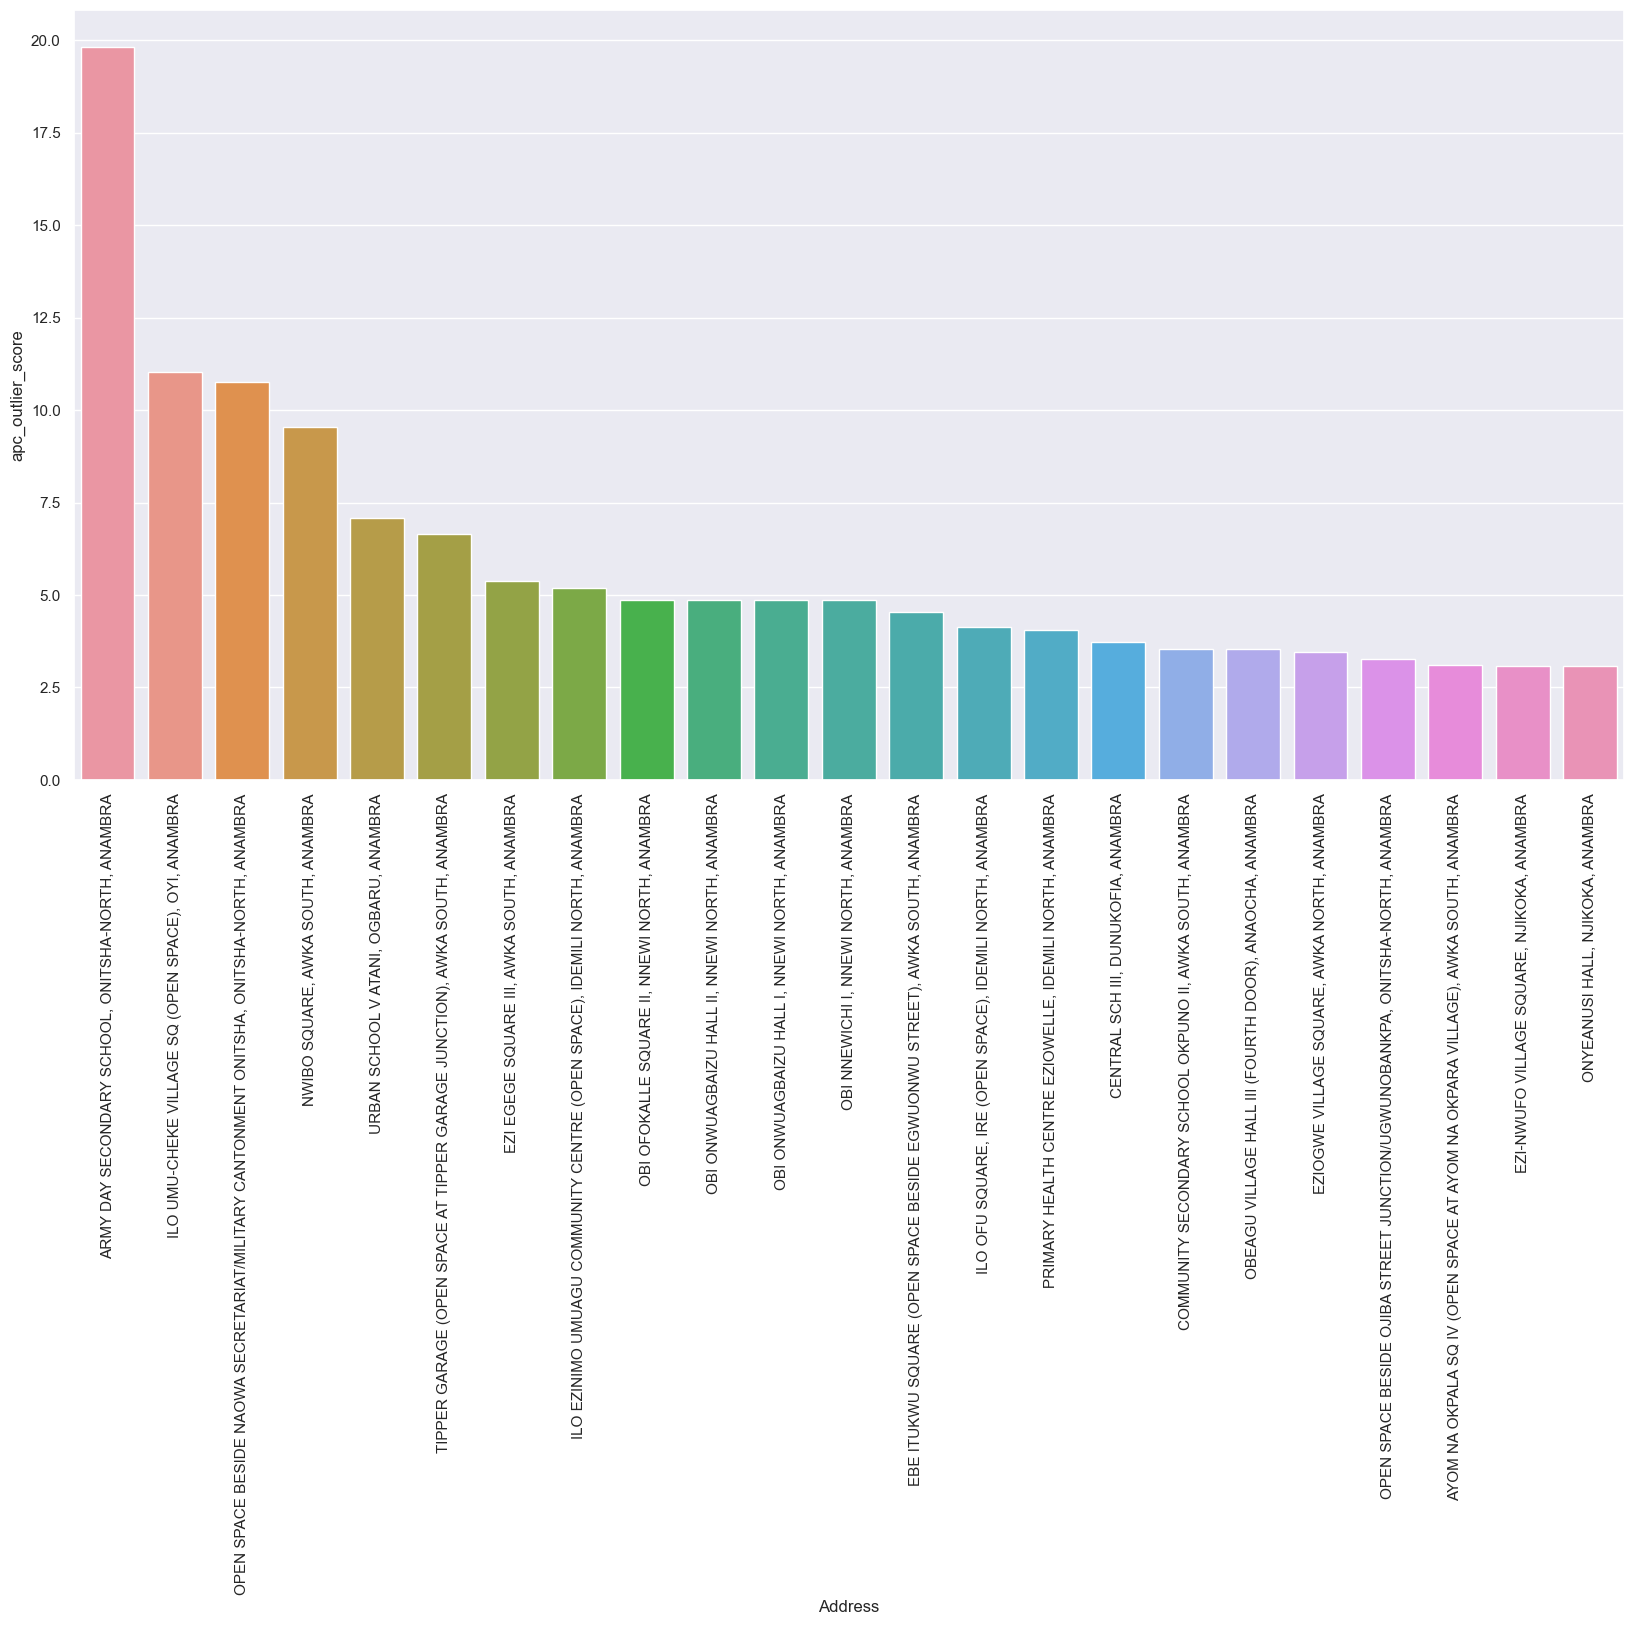

In [42]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1)
sns.barplot(x='Address', y='apc_outlier_score', data=apc_outlier)
plt.xticks(rotation=90)
plt.show;

In [46]:
lp_outlier = anambra_df_clean[anambra_df_clean['lp_outlier_score']>=3.0].sort_values(by='lp_outlier_score', ascending=False).drop(['apc_outlier_score','pdp_outlier_score','nnpp_outlier_score'], axis=1)

In [47]:
lp_outlier.to_excel('lp_outlier.xlsx', index=False)

In [61]:
lp_outlier.to_csv('lp_outlier.csv', index=False)

In [49]:
lp_outlier.shape

(33, 10)

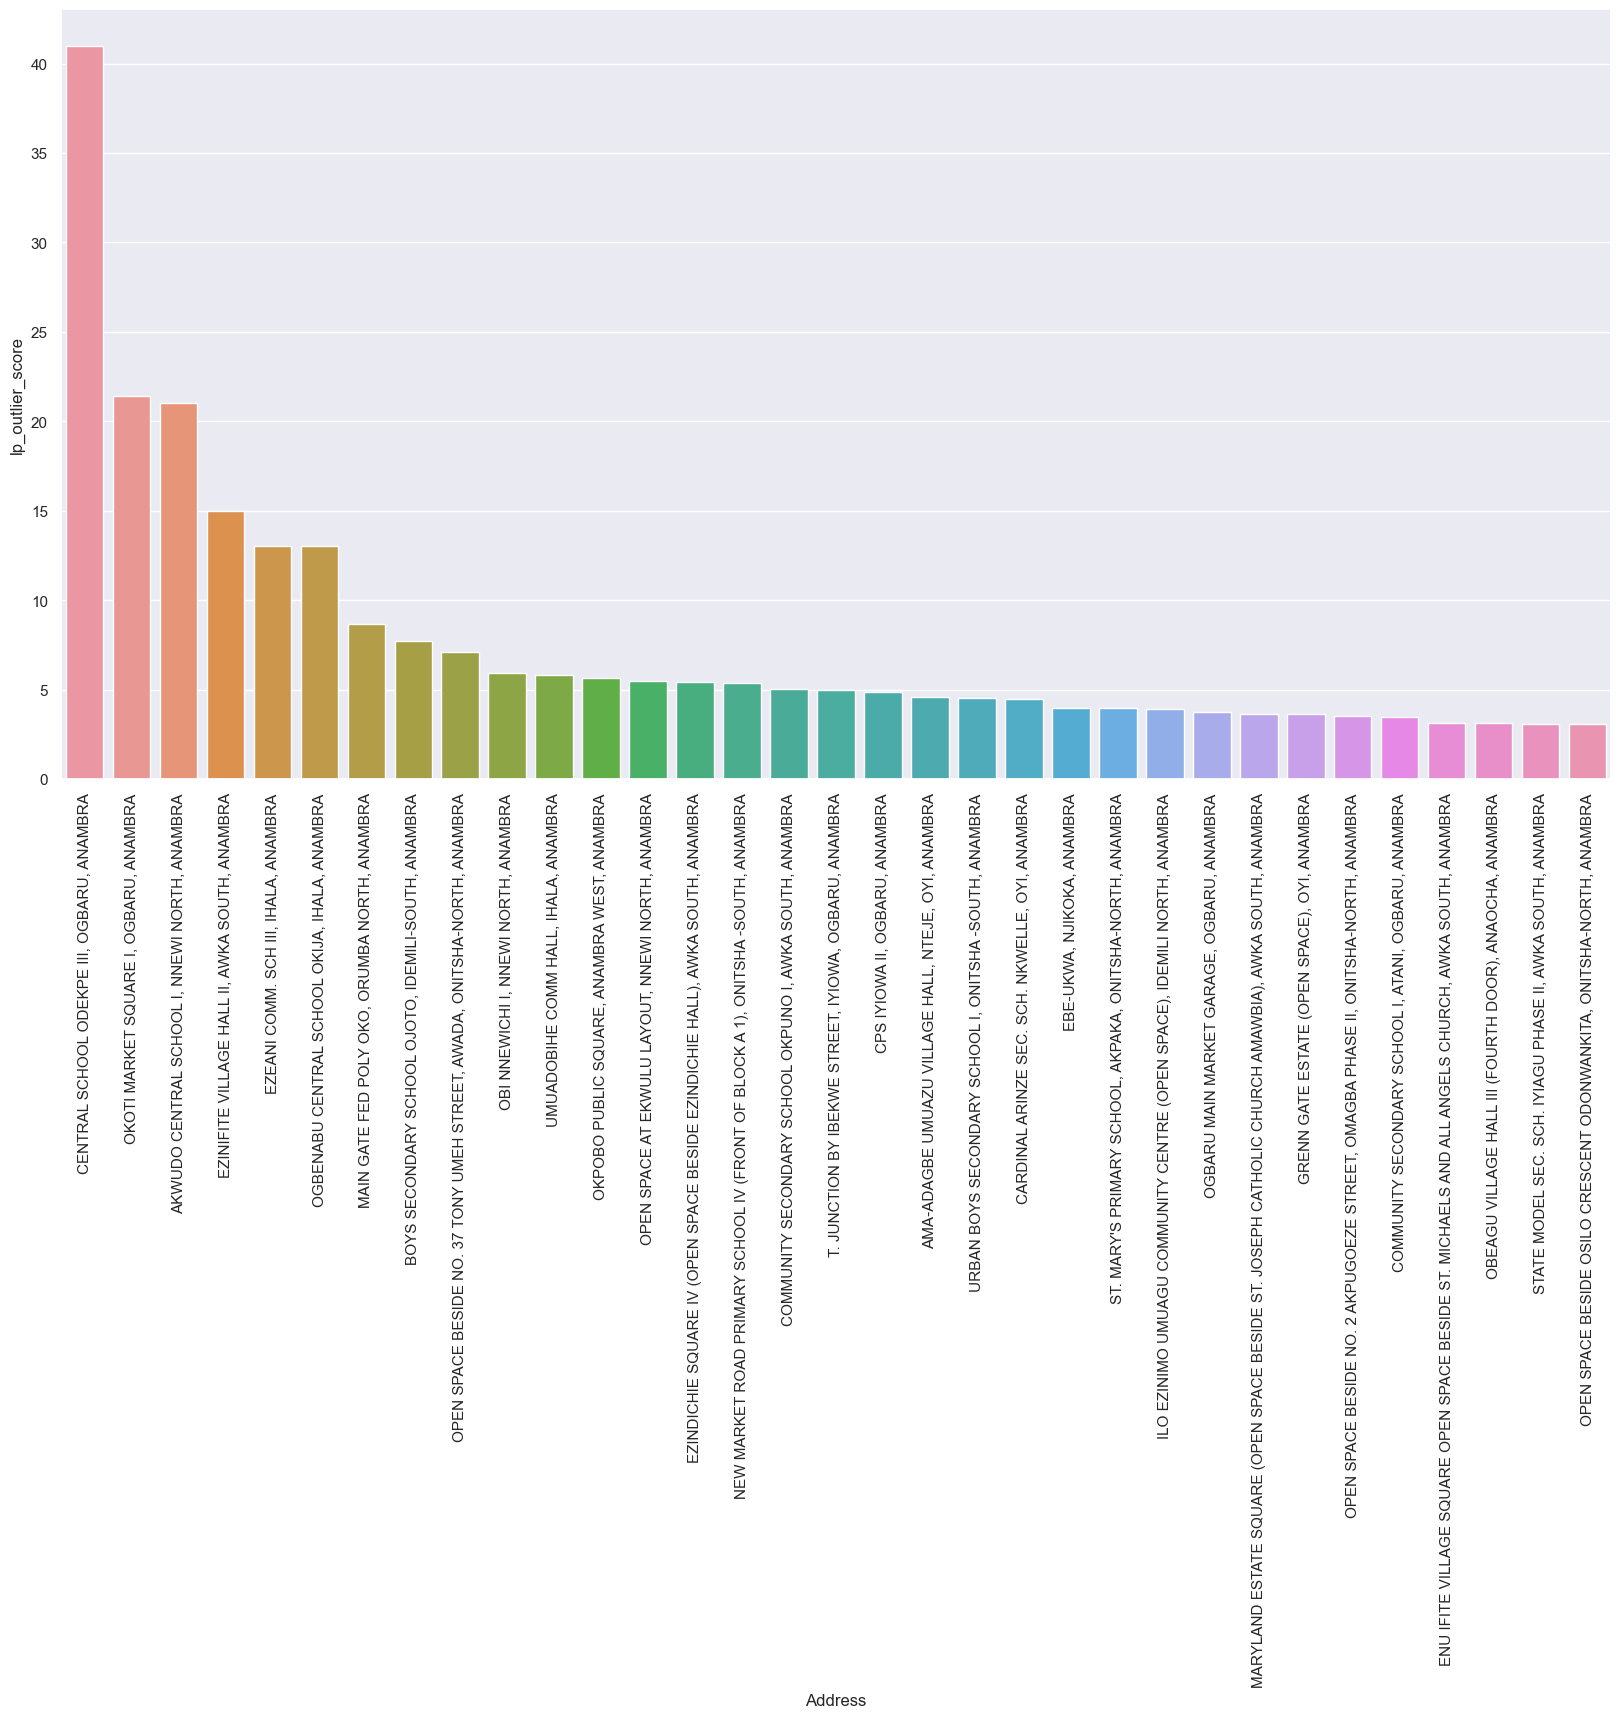

In [48]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1)
sns.barplot(x='Address', y='lp_outlier_score', data=lp_outlier)
plt.xticks(rotation=90)
plt.show;

In [50]:
pdp_outlier = anambra_df_clean[anambra_df_clean['pdp_outlier_score']>=3.0].sort_values(by='pdp_outlier_score', ascending=False).drop(['apc_outlier_score','lp_outlier_score', 'nnpp_outlier_score'], axis=1)

In [51]:
pdp_outlier.to_excel('pdp_outlier.xlsx', index=False)

In [62]:
pdp_outlier.to_csv('pdp_outlier.csv', index=False)

In [53]:
pdp_outlier.shape

(26, 10)

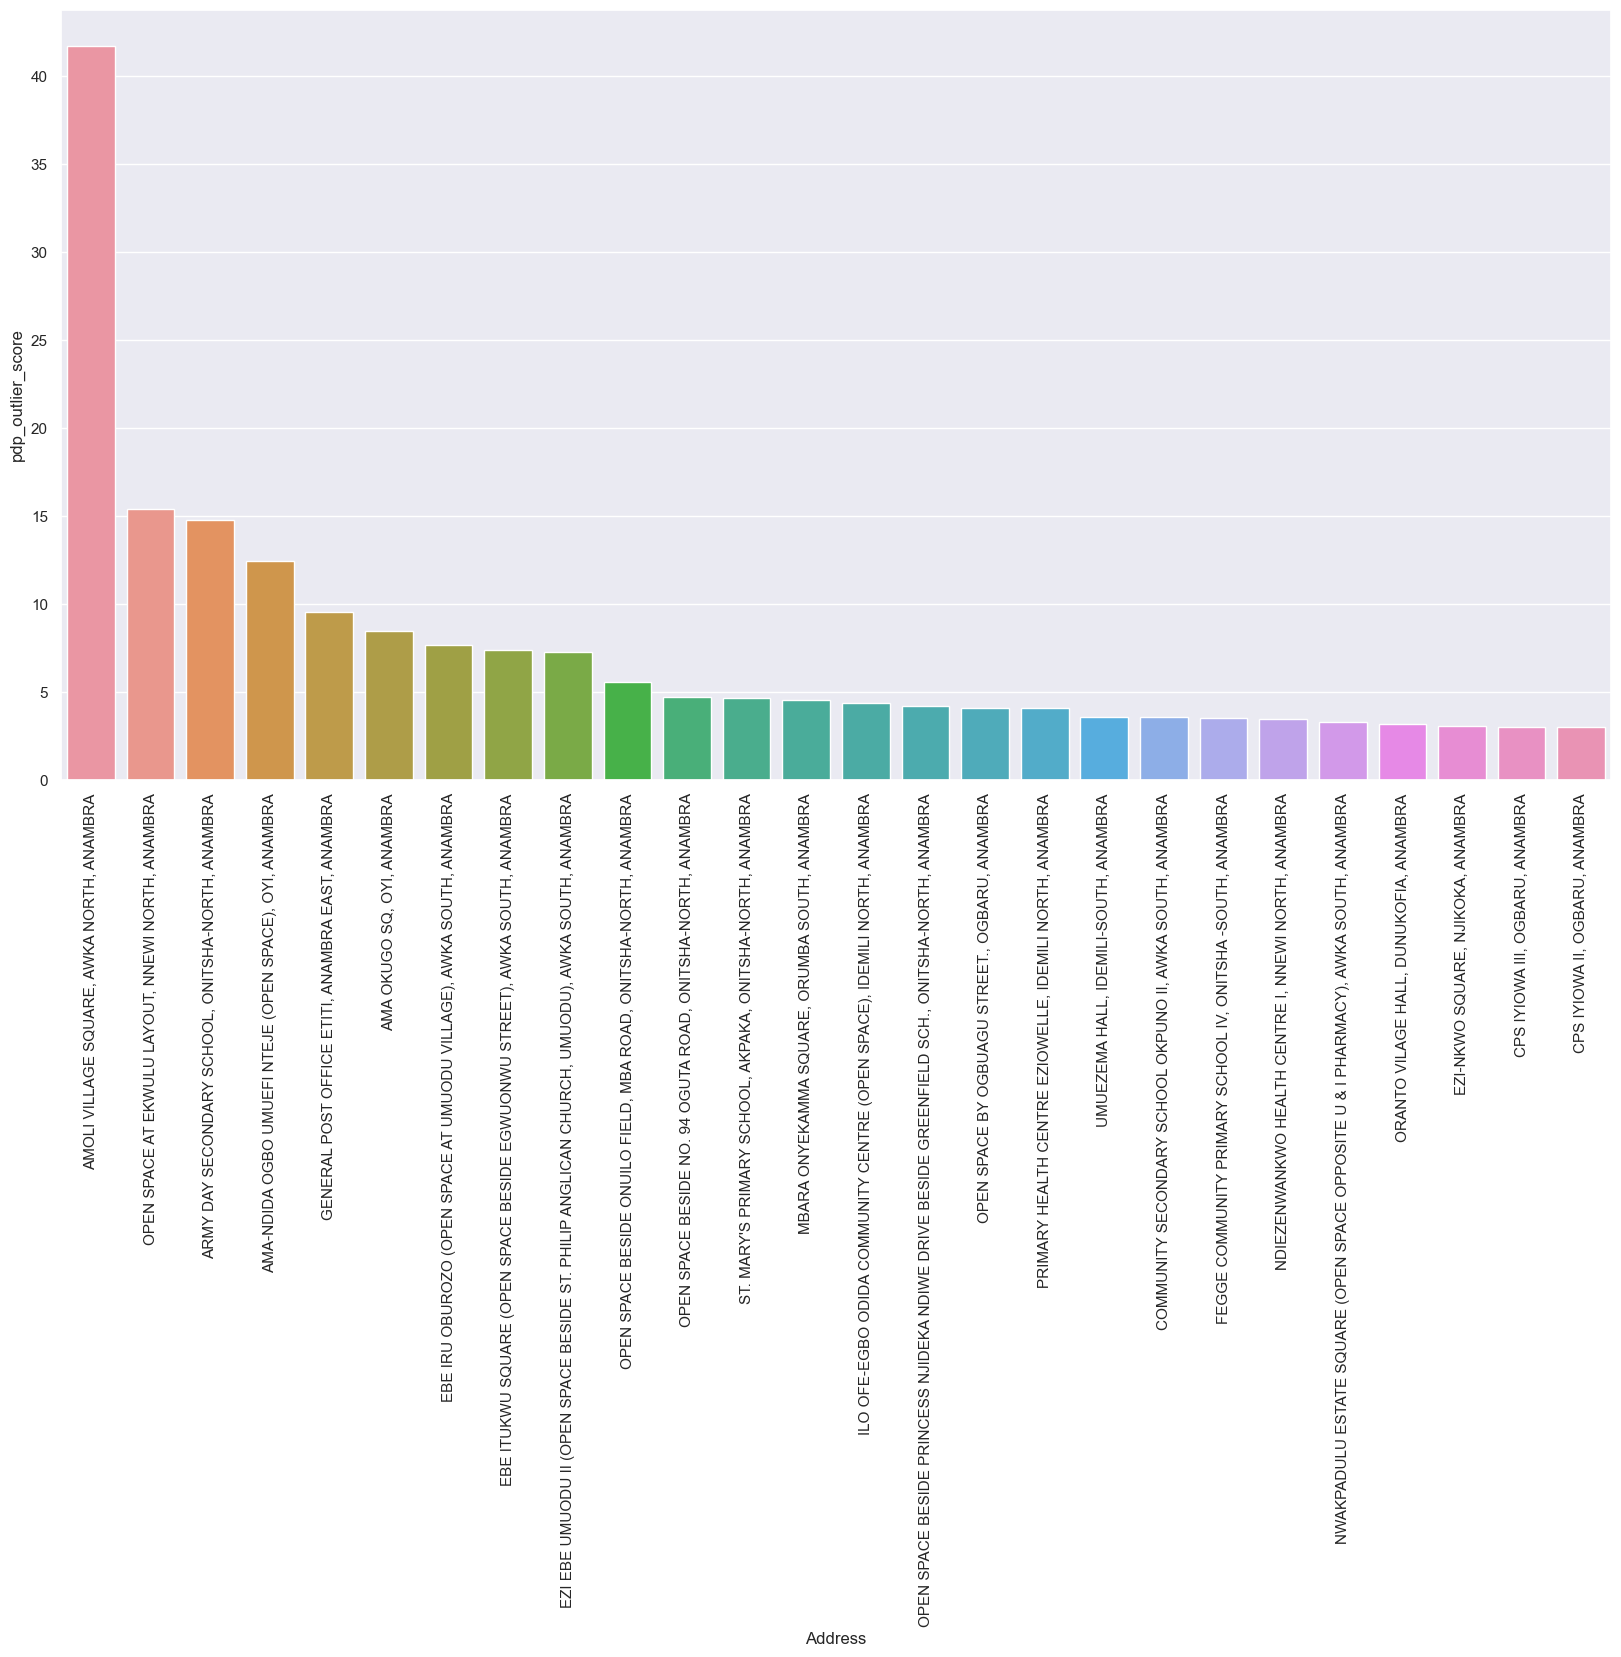

In [52]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1)
sns.barplot(x='Address', y='pdp_outlier_score', data=pdp_outlier)
plt.xticks(rotation=90)
plt.show;

In [54]:
nnpp_outlier = anambra_df_clean[anambra_df_clean['nnpp_outlier_score']>=3.0].sort_values(by='nnpp_outlier_score', ascending=False).drop(['apc_outlier_score','lp_outlier_score', 'pdp_outlier_score'], axis=1)

In [55]:
nnpp_outlier.to_excel('nnpp_outlier.xlsx', index=False)

In [63]:
nnpp_outlier.to_csv('nnpp_outlier.csv', index=False)

In [59]:
nnpp_outlier.shape

(23, 10)

In [56]:
#pip install seaborn

In [57]:
#import seaborn as sns

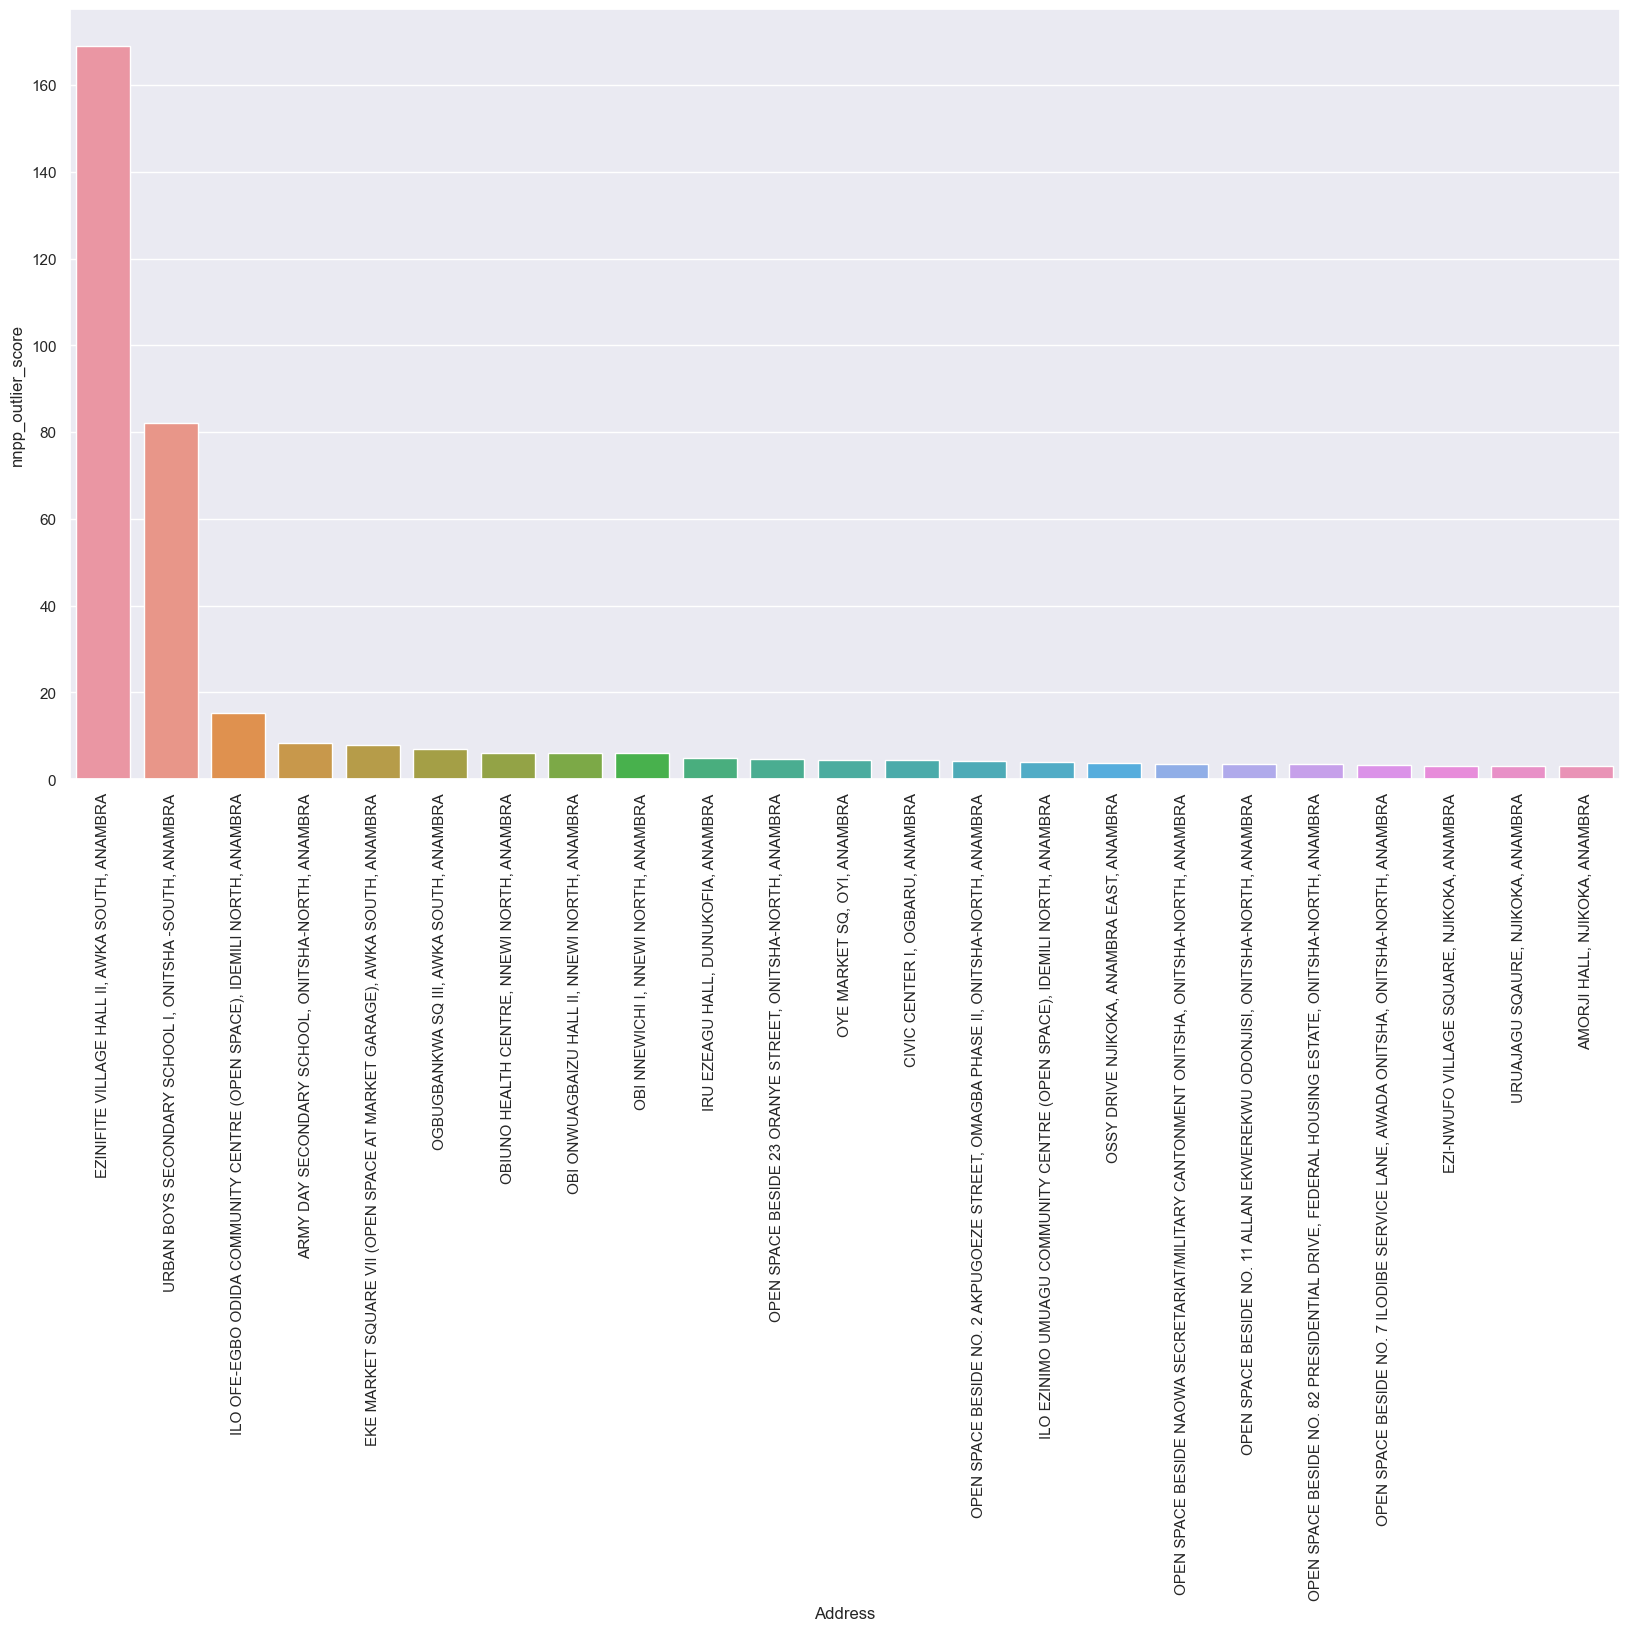

In [58]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1)
sns.barplot(x='Address', y='nnpp_outlier_score', data=nnpp_outlier)
plt.xticks(rotation=90)
plt.show;